# LAB 4: Topic modeling

Use topic models to explore hotel reviews

Objectives:
* tokenize with MWEs using spacy
* estimate LDA topic models with tomotopy
* visualize and evaluate topic models
* apply topic models to interpretation of hotel reviews

## Analyze reviews

In [1]:
import pandas as pd
import numpy as np
from cytoolz import *
from tqdm.auto import tqdm
tqdm.pandas()

### Read in hotel review data and tokenize it

In [2]:
df = pd.read_parquet('hotels.parquet')

In [3]:
import tomotopy as tp

mdl = tp.LDAModel.load('hotel-topics.bin') # import topic model 

In [4]:
# hotels with 1 star review
df[df['overall']==1]['name'].value_counts().head(20)

Hotel Pennsylvania New York                      1358
Hotel Carter                                      685
Hudson New York                                   486
Park Central                                      330
The Boston Park Plaza Hotel & Towers              238
W New York                                        233
The Roosevelt Hotel                               206
Edison Hotel Times Square                         195
Wellington Hotel                                  178
Paradise Point Resort & Spa                       169
Waldorf Astoria New York                          168
Milford Plaza Hotel                               157
Town and Country Resort Hotel                     157
Manhattan Broadway Hotel                          147
Grand Hyatt New York                              145
Doubletree Hotel Metropolitan - New York City     145
Le Parker Meridien                                144
Fort Rapids Indoor Waterpark Resort               143
New York Inn                

Pick a hotel with a lot of 1 star ratings (other than the Paradise Point Resort & Spa) and pull out all of its reviews

In [24]:
subdf = df[df['name']=='Park Central']

In [25]:
subdf['overall'].value_counts()

4.0    826
5.0    576
3.0    450
1.0    330
2.0    313
Name: overall, dtype: int64

Tokenize

In [26]:
from tokenizer import MWETokenizer

tokenizer = MWETokenizer(open('hotel-terms.txt'))

In [27]:
subdf['tokens'] = subdf['text'].progress_apply(tokenizer.tokenize)

  0%|          | 0/2495 [00:00<?, ?it/s]

<ipython-input-27-639ec7ac7f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['tokens'] = subdf['text'].progress_apply(tokenizer.tokenize)


### Apply topic model

In [28]:
subdf['docs'] = [mdl.make_doc(words=toks) for toks in subdf['tokens']]

<ipython-input-28-4ea85f0a2328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['docs'] = [mdl.make_doc(words=toks) for toks in subdf['tokens']]


In [29]:
topic_dist, ll = mdl.infer(subdf['docs']) # apply inference in a model

### Interpret model

What topics are associated with a review?

In [31]:
subdf['text'].iloc[0]

'Bedbugs!!!! No acknowledgement, no bill adjustment, just fill out a form for Security. I showed the manager a bite, and I am still itching like crazy! Only where my body was in contact with the bed did I have bites.'

In [32]:
subdf.iloc[0]

title                                              “BEDBUGS !!!!!”
text             Bedbugs!!!! No acknowledgement, no bill adjust...
date_stayed                                          December 2012
date                                           2012-12-18 00:00:00
service                                                        1.0
cleanliness                                                    2.0
overall                                                        2.0
value                                                          2.0
location                                                       4.0
sleep_quality                                                  2.0
rooms                                                          3.0
locality                                             New York City
name                                                  Park Central
tokens           [bedbugs, no, acknowledgement, no, bill, adjus...
docs             (bedbugs, no, acknowledgement, no, bill, adju

In [33]:
subdf['docs'].iloc[0].get_topics(top_n=5)

[(27, 0.25593283772468567),
 (88, 0.18703432381153107),
 (42, 0.1144365519285202),
 (55, 0.07587379962205887),
 (23, 0.050215598195791245)]

In [34]:
mdl.get_topic_words(27)

[('bed', 0.06528150290250778),
 ('sheets', 0.029149774461984634),
 ('bugs', 0.028983524069190025),
 ('dirty', 0.01862058788537979),
 ('place', 0.016182251274585724),
 ('them', 0.012413909658789635),
 ('over', 0.011139323934912682),
 ('stains', 0.010252655483782291),
 ('worst', 0.009920155629515648),
 ('never', 0.009753905236721039)]

In [35]:
mdl.get_topic_words(88)

[('he', 0.05716216564178467),
 ('she', 0.03781583160161972),
 ('said', 0.026511752977967262),
 ('told', 0.023378266021609306),
 ('asked', 0.021613676100969315),
 ('her', 0.017239628359675407),
 ('him', 0.014608782716095448),
 ('went', 0.014095447026193142),
 ('front_desk', 0.013785307295620441),
 ('called', 0.012116966769099236)]

In [36]:
mdl.get_topic_words(42)

[('after', 0.01562531478703022),
 ('their', 0.014450198039412498),
 ('manager', 0.010498704388737679),
 ('been', 0.009865948930382729),
 ('front_desk', 0.00874248519539833),
 ('who', 0.008652091957628727),
 ('never', 0.008497131057083607),
 ('management', 0.008432564325630665),
 ('problem', 0.007799808867275715),
 ('guests', 0.007309100590646267)]

In [37]:
mdl.get_topic_words(55)

[('per', 0.04418307915329933),
 ('day', 0.03685084357857704),
 ('charge', 0.031250204890966415),
 ('pay', 0.025108443573117256),
 ('parking', 0.021509965881705284),
 ('internet', 0.018046770244836807),
 ('extra', 0.015909327194094658),
 ('cost', 0.01474591065198183),
 ('price', 0.01447534840553999),
 ('10', 0.013311930932104588)]

What are the most common topics?

In [38]:
subdf['topics'] = [list(map(first, d.get_topics(3))) for d in subdf['docs']]

<ipython-input-38-b8d81d74ac29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['topics'] = [list(map(first, d.get_topics(3))) for d in subdf['docs']]


In [39]:
subdf['topics']

72543    [27, 88, 42]
72544    [70, 47, 88]
72545    [70, 36, 30]
72546    [21, 92, 42]
72547     [36, 9, 42]
             ...     
75033    [78, 56, 67]
75034    [92, 23, 75]
75035    [78, 42, 61]
75036      [7, 66, 9]
75037     [57, 5, 23]
Name: topics, Length: 2495, dtype: object

In [40]:
from collections import Counter

In [41]:
topic_freq = Counter(concat(subdf['topics']))
print(f'Top Freq Words')
for t, c in topic_freq.most_common(20):
    print(f'{t:3d} {c:4d}', ', '.join(map(first, mdl.get_topic_words(t))))

Top Freq Words
 78  666 times_square, nyc, new_york, subway, central_park, broadway, ny, blocks, block, away
 96  425 new_york, really, reception, helpful, its, day, nights, lovely, fantastic, 5
 23  413 your, what, go, am, want, place, people, because, their, them
 42  316 after, their, manager, been, front_desk, who, never, management, problem, guests
 88  251 he, she, said, told, asked, her, him, went, front_desk, called
 84  226 small, breakfast, bit, overall, really, little, comfortable, ok, price, too
 36  208 other, some, than, hotels, more, most, been, many, however, any
  6  205 reviews, after, read, other, some, reading, booked, based, what, surprised
 30  199 old, carpet, furniture, been, dirty, bathroom, worn, some, need, looked
 45  196 helpful, friendly, comfortable, extremely, definitely, recommend, excellent, enjoyed, spacious, quiet
 70  193 she, he, her, who, made, his, name, front_desk, thank, make
 71  184 check, ready, arrived, p.m., early, until, after, 2, before,

Most common topics in 1 star reviews?

In [42]:
topic_freq = Counter(concat(subdf[subdf['overall']==1]['topics']))
print(f'Top Freq Words')
for t, c in topic_freq.most_common(20):
    print(f'{t:3d} {c:4d}', ', '.join(map(first, mdl.get_topic_words(t))))

Top Freq Words
 42  129 after, their, manager, been, front_desk, who, never, management, problem, guests
 88   88 he, she, said, told, asked, her, him, went, front_desk, called
 23   76 your, what, go, am, want, place, people, because, their, them
 43   70 shower, bathroom, water, toilet, dirty, floor, sink, been, off, towels
 30   58 old, carpet, furniture, been, dirty, bathroom, worn, some, need, looked
 33   40 minutes, called, call, front_desk, phone, service, took, after, 15, 10
 29   33 back, left, got, went, them, door, came, front_desk, after, checked
 53   31 really, what, place, else, go, 'd, much, more, nothing, think
 76   28 reservation, booked, told, their, called, made, rate, reservations, booking, before
 27   27 bed, sheets, bugs, dirty, place, them, over, stains, worst, never
 36   24 other, some, than, hotels, more, most, been, many, however, any
 75   23 beds, two, 2, booked, double, bed, got, queen, upgrade, king
 71   22 check, ready, arrived, p.m., early, until, 

Most common topics in 5 star reviews?

In [43]:
topic_freq = Counter(concat(subdf[subdf['overall']==5]['topics']))
print(f'Top Freq Words')
for t, c in topic_freq.most_common(20):
    print(f'{t:3d} {c:4d}', ', '.join(map(first, mdl.get_topic_words(t))))

Top Freq Words
 78  204 times_square, nyc, new_york, subway, central_park, broadway, ny, blocks, block, away
 96  126 new_york, really, reception, helpful, its, day, nights, lovely, fantastic, 5
 70  122 she, he, her, who, made, his, name, front_desk, thank, make
 45   91 helpful, friendly, comfortable, extremely, definitely, recommend, excellent, enjoyed, spacious, quiet
 23   91 your, what, go, am, want, place, people, because, their, them
 92   88 recommend, highly, friendly, great_location, comfortable, definitely, service, everything, perfect, really
 47   75 service, their, make, every, way, feel, made, experience, always, guests
  6   49 reviews, after, read, other, some, reading, booked, based, what, surprised
 77   48 been, times, years, always, has, time, year, many, several, over
 34   47 back, go, come, loved, friendly, love, really, definitely, time, home
 84   41 small, breakfast, bit, overall, really, little, comfortable, ok, price, too
  9   39 within, restaurants, walk

### Report

Finish this notebook by writing a brief report to the hotel managers describing what you've found in the reviews of their hotel, along with some actionable advice. Use whatever data, charts, word clouds, etc. that you think will help you make your case. 

Park Central hotel has more than 300 1-star reviews and more than 800 5-star reviews. There are more 5-star reviews for Park Central hotel, which is good. However, the amount of 1-star reviews are a lot. Reducing the number of 1-star reviews would increase the number of customers for Park Central hotel. 

For the 5-star hotel review at Park Central hotel, they mainly talked about the location of the hotel. The location of the hotel is in New York, near time square, and walking distant to where the guests wished to go. Most of the review mentioned the receptions were helpful and made their stay pleasant. In addition, the rooms were comfortable that the guests would recommend someone else to stay there. Here are some of the most frequent words from 5-star reviews in a wordcloud: 


In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

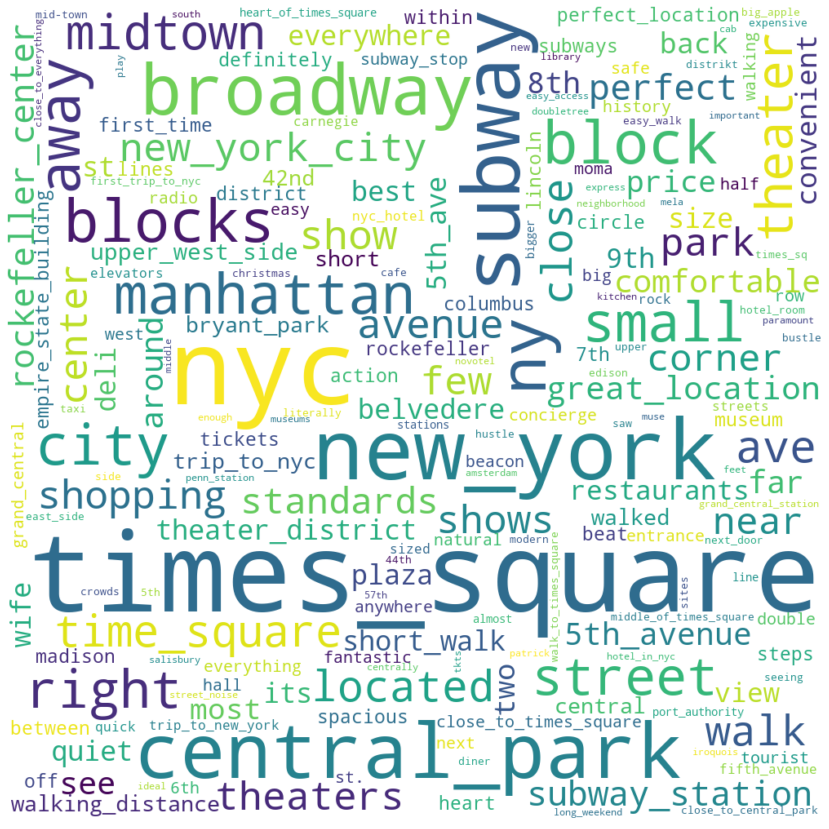

In [48]:
plt.figure(figsize=(15,15))
freqs = dict(mdl.get_topic_words(78, 200)) # top 200 words in topic 78
wc = WordCloud(width=1000,height=1000,background_color='white').generate_from_frequencies(freqs)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

As we can see, the most mentioned words in the most mentioned topics are times square, New York city, walking distance, and subway station. This indicates that the location of Park Central hotel is good. Guests can walk to different places and the subway station. The location of the hotel made great impact on the guests' stay which attracted lots of 5-star reviews. 

However, for the 1-star review, the guests also talked about how the front-desk was not as helpful. Although, some guests thought that the receptions were the most helpful, but other guests thought the front-desk were extremely useless. This issue can come from differene employees in the hotels. Some employees might be more helpful than other employees. In addition, guests also complaint about how dirty and smelly their rooms were. More specifically, bed bugs were found in some of the guests' rooms, and the smell of smokes was also detected from some guests' rooms. Moreover, there are numerous of reviews that dicussed how small the rooms were. The issue of small room cannot be fix without rebuilding the whole hotel. However, this might be due to false advertising. Here is a wordcloud of the most frequent words from 1-star review: 

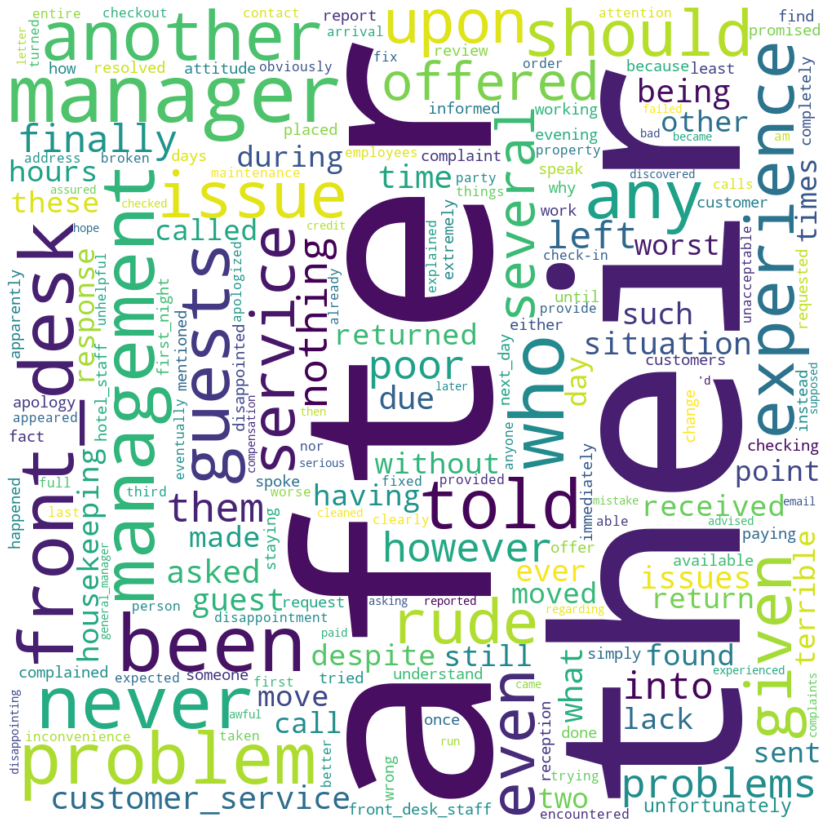

In [49]:
plt.figure(figsize=(15,15))
freqs = dict(mdl.get_topic_words(42, 200)) # top 200 words in topic 42
wc = WordCloud(width=1000,height=1000,background_color='white').generate_from_frequencies(freqs)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

As we can see, this wordcloud contains the most frequent words in the most common topic of low star rating. Beside "after" and "their", the most common words that appears in a 1-star rating are management, problem, front desk, guest service, and rude. With these words alone, we can guest that the customers service from Park Central hotel should be improved to satify all customers.

Therefore, here are some tips to avoid having 1-star reviews: 

- Deep clean the room after each guest checkout including bed, sheets, bathroom, etc. 
- Hire friendly hoteliers (espicially front-desk staffs) who can handle pressure and have problem solving skills to make the guests have more pleasant stays
- Train employees to treat all guests the same and be more friendly and helpful to all guests
- Have separate rooms for guests who are smoking and are not smoking to avoid smell from smoking
- Do not include any hidden/surprising fee including internet, parking, etc.